In [2]:
import tensorflow as tf
from keras import optimizers
from keras.layers import Input, Lambda, Dense, Flatten,Dropout
from keras.models import Model,load_model,Sequential
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

from glob import glob
import os 

# re-size all the images to this
IMAGE_SIZE = [224, 224]


Using TensorFlow backend.


In [0]:
train_path = 'train_Flower'
valid_path = 'test_Flower'

In [3]:
#cd Transfer-Learning Folder inside which we have train_Flower and test_Flower Folder 

In [0]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [0]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

In [0]:

# useful for getting number of classes
folders = glob('train_Flower/*')

In [0]:
# our layers 
x = Flatten()(vgg.output)
#x=Dense(100,activation="relu")(x)
# x = Dense(1000, activation='relu')(x)
#x=Dropout(0.5)(x) 
prediction = Dense(len(folders), activation='softmax')(x)


In [0]:


# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train_Flower',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test_Flower',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 849 images belonging to 2 classes.
Found 491 images belonging to 2 classes.


In [0]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
27/27 [==============================] - 341s 13s/step - loss: 0.5778 - acc: 0.7596 - val_loss: 0.2537 - val_acc: 0.8982
Epoch 2/5
27/27 [==============================] - 9s 328ms/step - loss: 0.2117 - acc: 0.9179 - val_loss: 0.2306 - val_acc: 0.9084
Epoch 3/5
27/27 [==============================] - 13s 480ms/step - loss: 0.1476 - acc: 0.9527 - val_loss: 0.1892 - val_acc: 0.9246
Epoch 4/5
27/27 [==============================] - 13s 473ms/step - loss: 0.1129 - acc: 0.9687 - val_loss: 0.1831 - val_acc: 0.9145
Epoch 5/5
27/27 [==============================] - 13s 478ms/step - loss: 0.0777 - acc: 0.9780 - val_loss: 0.1849 - val_acc: 0.9267


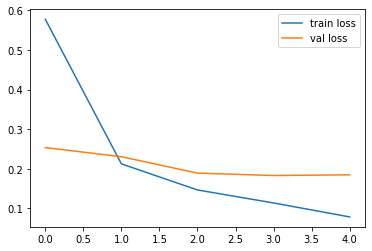

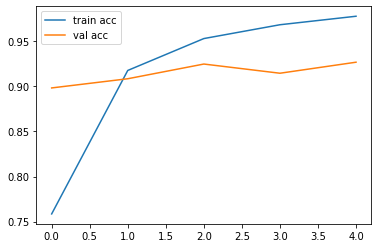

<Figure size 432x288 with 0 Axes>

In [0]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [0]:


model.save('Flower_Classification_Model.h5')

In [0]:


# dimensions of our images
img_width, img_height = 224, 224

# load the model we saved
model = load_model('Flower_Classification_Model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [0]:
filenames_sunflower=os.listdir('test_Flower/sunflower')
filenames_rose=os.listdir('test_Flower/rose')
filenames_sunflower[0:5]

['10386503264_e05387e1f7_m.jpg',
 '10386525005_fd0b7d6c55_n.jpg',
 '10386522775_4f8c616999_m.jpg',
 '11881770944_22b4f2f8f6_n.jpg',
 '10386702973_e74a34c806_n.jpg']

In [0]:
# predicting images
#img = image.load_img('test_Flower/rose/'+filenames_rose[14], target_size=(img_width, img_height))
img = image.load_img('test_Flower/sunflower/'+filenames_sunflower[14], target_size=(img_width, img_height))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)


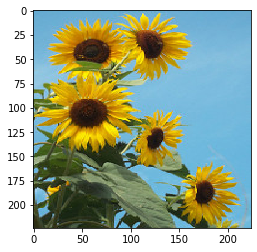

In [0]:
##Show image

plt.imshow(img)




In [0]:
images = np.vstack([x])
predictions = model.predict(images)
predictions=predictions.tolist()[0]

if predictions[0]>predictions[1]:
  print("ROSE")
else :
  print("SUNFLOWER")



SUNFLOWER
